# 理论部分
## 伯努利分布
### 伯努利过程的性质
> 在n个独立的、相同的试验中，每次试验的结果要么是“成功”($S$),要么是“失败”($F$)。\
“成功”的概率对于所有试验都是相同的($\pi = P(Y=1)$)。令$Y$是n次试验中“成功”的次数，则$Y$服从伯努利分布，$Y\sim Bin(n, \pi)$。\
$Y$取值为$(y = 0, 1, \cdots, n)$的概率为$P(Y = y) = \begin{pmatrix} n \\ y \end{pmatrix} \pi^y (1 - \pi)^{n-y} = \frac{n!}{y!(n-y)!} \pi^y (1-\pi)^{n-y})$\
$Y$的均值和方差：$E(Y) = n\pi$, $Var(Y ) = n\pi(1-\pi)$

### 伯努利变量

> 使用预测变量$x_1,x_2,\cdots , x_p$对$Y$“成功”的概率$\pi$进行建模：$(Y|x_i) \sim Bin(n_i, \pi(x_i))$\
“成功”的比例($\frac{y_i}{n_i}$)的方差和均值：$E(\frac{y_i}{n_i} | x_i) = \pi(x_i)$, $Var(\frac{y_i}{n_i} | x_i) = \frac{\pi(x_i)(1 - \pi(x_i))}{n_i}$

> 请注意，“成功”比例的方差取决于 $\pi(x_i)$，因此它不是常数。$\epsilon \sim N(0, \sigma^2)$ 的最小二乘回归不适合分析二项式响应。因此，在这种情况下，合适的模型是逻辑回归模型。逻辑回归将结果的**概率**与**预测变量的指数函数**联系起来：$\pi(Y=1 | X=x) = \frac{exp(\beta_0 + \beta_1 x)}{1 + exp(\beta_0 + \beta_1 x)}$

## 逻辑回归基础 (LOGIT)

> $\pi(x)$不是一条直线，而是呈 S 形：$x$ 值非常低时，导致“成功”的概率为零； 非常高的 $x$ 值导致 $\pi(x) = 1$。\
<img src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="30%">

> S 形函数的一个流行选择是逻辑回归：$\pi(x) = \frac{exp(\beta_0 + \beta_1 x)}{1 + exp(\beta_0 + \beta_1 x)} = \frac{1}{1 + exp(- \{\beta_0 + \beta_1 x\})}$, 对 $\beta_0 + \beta_1 x$ 求解，得到：$$\beta_0 + \beta_1 x = log(\frac{\pi(x)}{1 - \pi(x)})$$\
$\frac{\pi(x)}{1 - \pi(x)}$ 被称为有利于成功的**几率(odds)**。\
系数 $\beta_1$ 显示了 $x$ 对于**几率的对数**的影响：正值表示$x$的每一个单位增加“成功”的概率，\$\beta_1$的值越高，$x$的影响越大。

> 另一种解释:
$$\pi(x) \in [0,1]$$
$$odds = \frac{\pi(x)}{1 - \pi(x)} \in [0, \infty]$$
$$log(odds(x)) = \beta_0 + \beta_1 x \in (-\infty, \infty)$$

## 逻辑回归的残差
> 皮尔逊残差(Pearson residuals)
$$resid_{Pearson,i} = \frac{y_i/n_i - \hat{\pi}(x_i)}{\sqrt{\hat{Var}(y_i/n_i)}}$$

> 偏差残差(Deviance residuals)
$$resid_{Deviance,i} = sign(y_i/n_i - \hat{\pi}(x_i))g_i$$

> 如果皮尔逊残差和偏差残差图都产生非常相似的随机模式，那么所提出的模型就是一个有效的模型。\
<img src="./DataSet/iShot2022-02-28 22.24.12.png" width="30%">\
但是当响应变量是二元数据时，我们不能只依赖残差图进行模型诊断。
<img src="./DataSet/iShot2022-03-01 22.21.13.png" width="30%">\
上图的残差表现出高度非随机模式，但是，对于二进制数据，无论拟合模型是否有效，都可能发生这种情况

# 代码及示例部分
## 米其林餐厅
Zagat对 164 家法国餐厅进行了调查从而获得了纽约市餐厅评级。单击 [此处](https://gattonweb.uky.edu/sheather/book/data_sets.php) 获取数据 (`MichelinNY.csv`)。

> 数据集包含 6 个变量：\
`InMichelin` - 一个二进制响应变量，如果餐厅包含在米其林指南中则等于 1，否则等于 0；\
`Restaurant` - 餐厅名称；\
`Food` - 顾客对食物的评分，从 1 到 30；\
`Decor` - 客户对装饰的评分，范围为 1 到 30；\
`Service` - 客户对服务的评分，从 1 到 30；\
`Price` - 以美元计的晚餐价格。

在开始建模之前探索数据并评估样本量，确保所有变量都已正确加载，为四个预测变量中的每一个都绘制箱线图：米其林指南中包含的法国餐厅和未包含的法国餐厅的`Food`、`Decor`、`Service`和`Price`。

In [1]:
# 导入所需的包和数据
library(ggplot2)
library(Rmisc)

MichelinNY <- read.csv("./DataSet/MichelinNY.csv")
head(MichelinNY)

载入需要的程辑包：lattice

载入需要的程辑包：plyr



,InMichelin,Restaurant.Name,Food,Decor,Service,Price
,<int>,<chr>,<int>,<int>,<int>,<int>
1,0,14 Wall Street,19,20,19,50
2,0,212,17,17,16,43
3,0,26 Seats,23,17,21,35
4,1,44,19,23,16,52
5,0,A,23,12,19,24
6,0,A.O.C.,18,17,17,36


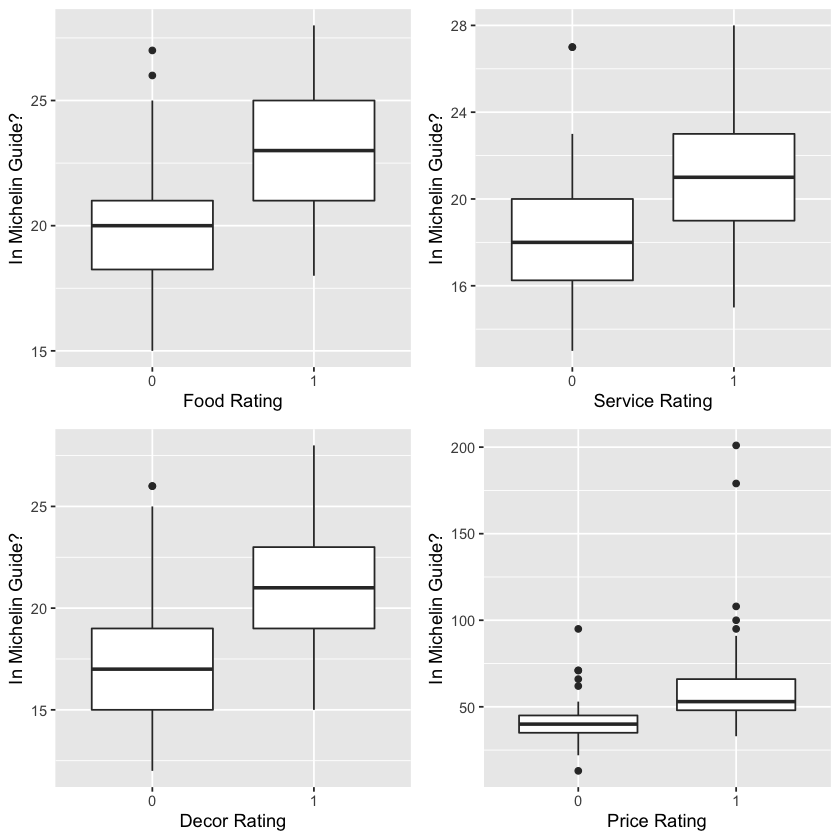

In [2]:
p1 <- ggplot(MichelinNY, aes(x = as.factor(InMichelin), y = Food)) +
  geom_boxplot() + labs(x="Food Rating", y="In Michelin Guide?")
p2 <- ggplot(MichelinNY, aes(x = as.factor(InMichelin), y = Decor)) +
  geom_boxplot() + labs(x="Decor Rating", y="In Michelin Guide?")
p3 <- ggplot(MichelinNY, aes(x = as.factor(InMichelin), y = Service)) +
  geom_boxplot() + labs(x="Service Rating", y="In Michelin Guide?")
p4 <- ggplot(MichelinNY, aes(x = as.factor(InMichelin), y = Price)) +
  geom_boxplot() + labs(x="Price Rating", y="In Michelin Guide?")
multiplot(p1,p2,p3,p4,cols = 2)

> 一般来说，看起来米其林指南中包含的法国餐厅的食物分布、装饰和服务评级以及价格的中位数大于指南中未包含的餐厅分布。

### 构建逻辑回归模型

> 下一步，我们将估计一个逻辑回归模型，该模型包含我们拥有的所有变量，包括price的对数变换：\
$$ log(\frac{\pi(InMichelin_i = 1)}{1 - \pi(InMichelin_i = 1)}) = \beta_0 + \beta_1 Food_i + \beta_2 Decor_i + \beta_3 Service_i + \beta_4 log(Price_i) + \epsilon_i $$\
为了估计模型，我们将使用 `stats` 包中的 `glm()` 函数：

In [3]:
m1 <- glm(InMichelin~Food+Decor+Service+log(Price),
          family=binomial(),data=MichelinNY)
summary(m1)


Call:
glm(formula = InMichelin ~ Food + Decor + Service + log(Price), 
    family = binomial(), data = MichelinNY)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1452  -0.6562  -0.3016   0.6857   2.1167  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -27.16503    4.89856  -5.546 2.93e-08 ***
Food          0.50755    0.15317   3.314 0.000921 ***
Decor         0.05234    0.09009   0.581 0.561251    
Service      -0.28596    0.13577  -2.106 0.035179 *  
log(Price)    5.44863    1.49736   3.639 0.000274 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.79  on 163  degrees of freedom
Residual deviance: 141.03  on 159  degrees of freedom
AIC: 151.03

Number of Fisher Scoring iterations: 5


> `LOGIT`模型中的正系数转化为大于 1 的几率，而负系数转化为小于 1 的几率。更具体地说，查看“食物”和“对数（价格）”的系数都**正**（不打算解释“装饰”系数，因为它在统计上不显着）。

> `food` 评级增加 1 个单位，在所有其他变量保持不变的情况下，与被列入米其林指南的几率增加$exp(0.507) = 1.66$。同样，`log(Price)` 增加 1 个单位与被米其林指南收录的几率增加$exp (5.45) = 233$。
根据我们的模型，`service` 评分增加 1 个单位与餐厅最终进入米其林指南的可能性降低 25%，因为$exp( -0.285) = 0.75$。

### 二进制数据的边际模型图

> 我们需要另一种方法来检查模型的有效性。 我们可以使用边际模型图 (MMP) 评估估计模型与数据的拟合程度。 MMP 是响应变量$Y$（在本次示例中为 `InMichelin`）与预测变量$x_1$（例如，`Food`）与 LOESS 拟合的图。 如果两个非参数拟合一致，则$x_1$可以确认为由模型正确建模。\
生成 MMP 的一种简单的方法是使用包 `car `中的命令 `mmps()`：


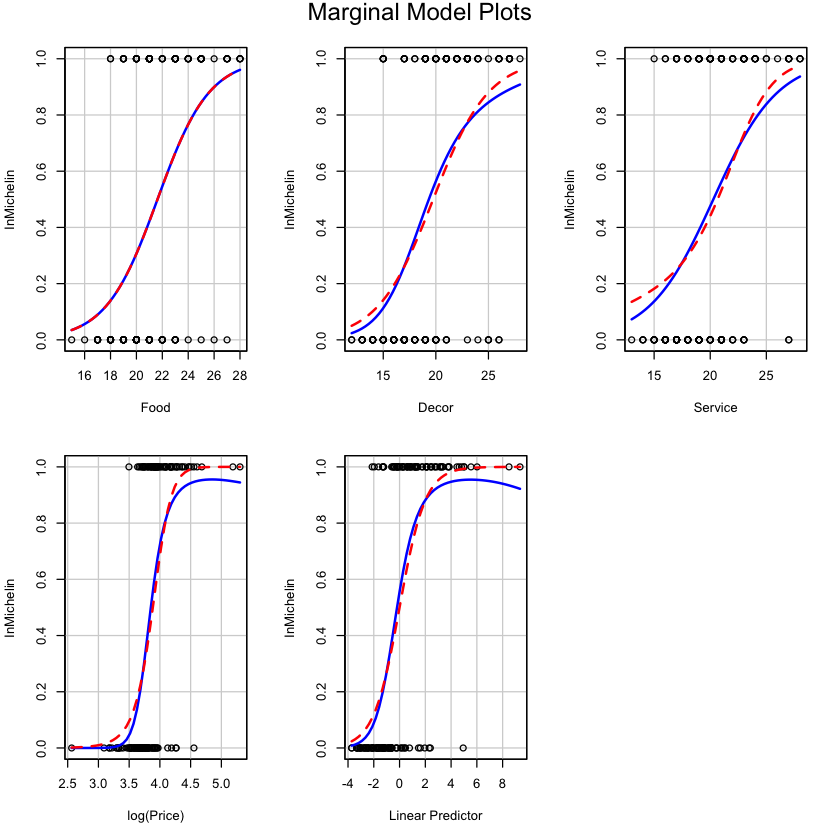

In [4]:
car::mmps(m1, layout=c(2,3), key=FALSE)

### 测试交互的假设

> 事实证明，我们的客户认为具有高`Service`和高`Decor`评级的餐厅更有可能最终进入米其林指南。 我们可以通过在我们的模型中包含一个交互项`Service:Decor`来测试这个假设。 所以下一个模型是：
$$log(\frac{\pi(InMichelin_i = 1)}{1 - \pi(InMichelin_i = 1)}) = \beta_0 + \beta_1 Food_i + \beta_2 Decor_i + \beta_3 Service_i + \beta_4 log(Price_i)+ \beta_5 Service_i \times Decor_i + \epsilon_i$$

In [5]:
m2 <- glm(InMichelin~Food+Decor+Service+log(Price)+Service:Decor,
          family=binomial(),data=MichelinNY)
summary(m2)


Call:
glm(formula = InMichelin ~ Food + Decor + Service + log(Price) + 
    Service:Decor, family = binomial(), data = MichelinNY)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6555  -0.6270  -0.1598   0.5398   2.2935  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -63.76436   14.09848  -4.523 6.10e-06 ***
Food            0.64274    0.17825   3.606 0.000311 ***
Decor           1.50597    0.47883   3.145 0.001660 ** 
Service         1.12633    0.47068   2.393 0.016711 *  
log(Price)      7.29827    1.81062   4.031 5.56e-05 ***
Decor:Service  -0.07613    0.02448  -3.110 0.001873 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.79  on 163  degrees of freedom
Residual deviance: 131.23  on 158  degrees of freedom
AIC: 143.23

Number of Fisher Scoring iterations: 6


> 估计结果表明，在包含交互项后，`Decor`变得具有统计意义。\
交互项 `Service:Decor` 的系数为负并且在 5% 的显着性水平上具有统计学意义，这意味着**我们客户的假设不受数据支持**。根据我们的模型，`Service`和`Decor`同时每增加 1 个单位，被米其林指南收录的可能性就会降低 8%($exp(-0.08) ) = 0.92$)。

> 模型`m2`中的所有回归系数在 5% 显着性水平上均显着。有趣的是，预测变量 `Food`、`Service`、`Decor` 和 `log(Price)` 的系数是正的，这意味着（所有其他条件相同）更高的 `Food`、`Service`、`Decor` 和`log(Price)`会增加法国餐厅被米其林指南收录的机会，正如人们所期望的那样。 `Service` 和 `Decor` 之间的交互项系数为**负**，从而**调节** `Service` 和 `Decor` 的个体效应。

In [6]:
# 检查模型 m2 是否优于模型 m1：
anova(m1,m2,test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,159,141.0274,NA,NA,NA
2,158,131.2288,1,9.798596,0.001746451


> 根据上述结果，`Decor` 和 `Service` 的交互项的添加显着降低了 5% 显着性水平上的**偏差**。

> 或者可以使用 `mmps()` 函数验证模型拟合度。

Warning message in car::mmps(m2, layout = c(2, 3), key = FALSE, main = "Marginal Model Plots for m2"):
“Interactions and/or factors skipped”


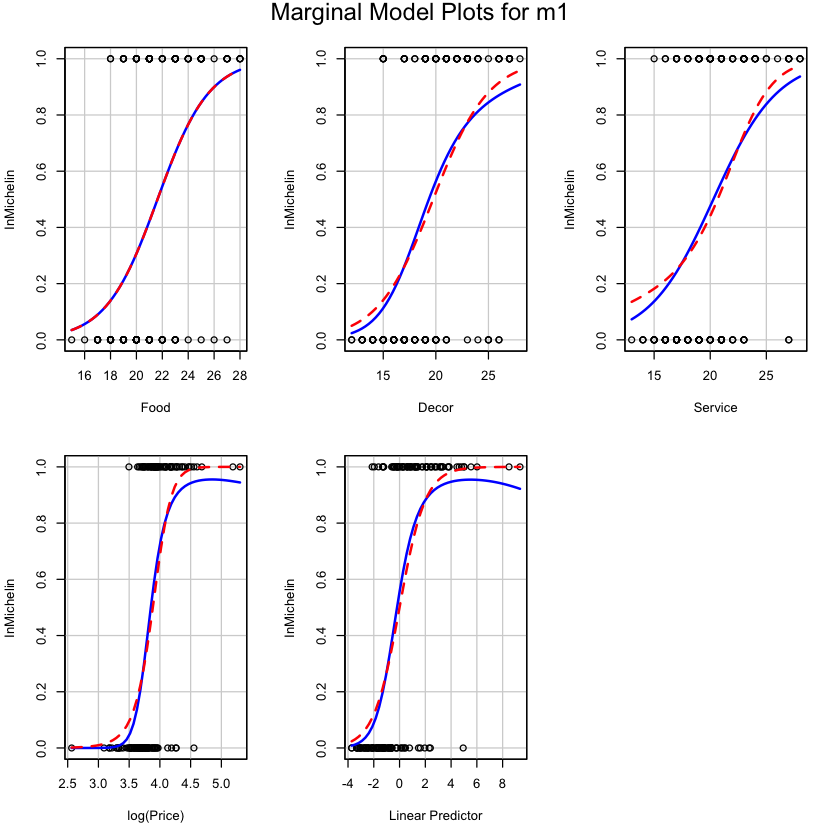

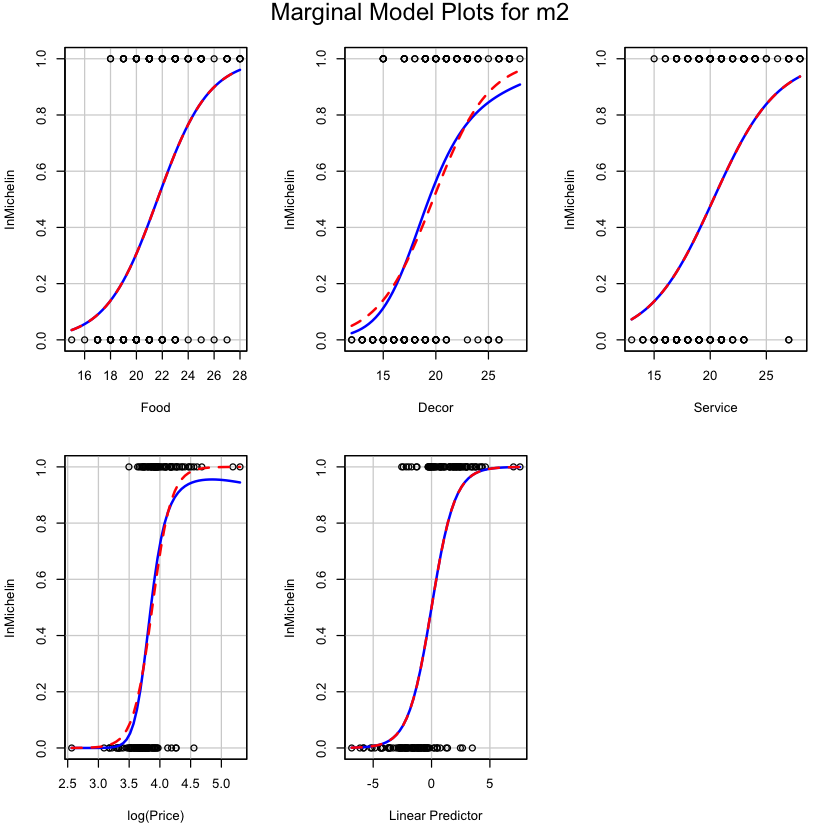

In [7]:
car::mmps(m1, layout=c(2,3), key=FALSE, main = "Marginal Model Plots for m1")
car::mmps(m2, layout=c(2,3), key=FALSE, main = "Marginal Model Plots for m2")

## 信用卡违约客户

> 在本次示例中使用《统计学习导论：研讨会》一书中的信用卡默认数据集，该数据集包含四个变量：\
`defaulted`：客户是否违约，No代表未违约，Yes代表违约。\
`student`：客户身份是否时学生，No代表不是学生，Yes代表客户为学生。\
`balance`：客户账户余额。\
`income`：客户收入。

> 该数据集中的目标是预测信用卡债务违约的个人。

In [8]:
# 载入数据
Default <- read.csv("./DataSet/Default.csv", stringsAsFactors = TRUE) 
# 查看主要属性
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ defaulted: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student  : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance  : num  730 817 1074 529 786 ...
 $ income   : num  44362 12106 31767 35704 38463 ...


In [9]:
# 变量“defaulted”的编码从级别为“No”、“Yes”的更改为值为1/0的数字变量
# 将“否”编码为0，将“是”编码为1
Default$defaulted <- 1*(Default$defaulted=="Yes")
# 计算每个类的出现情况
table(Default$defaulted)
# 附加data.frame
attach(Default)


   0    1 
9667  333 

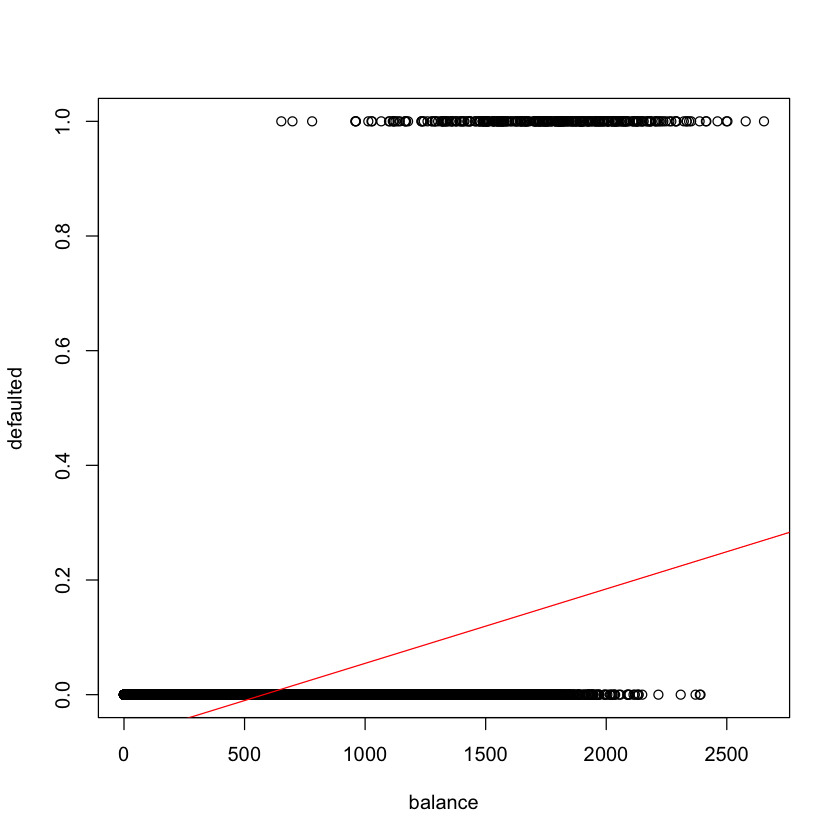

In [10]:
# 估计线性回归
linear.model <- lm(defaulted ~ balance)
# 可视化数据
plot(balance, defaulted)
# 可视化拟合的线性回归
abline(linear.model, col="red")

> 正如我们从上图中看到的那样，线性回归模型允许违约概率为负。虽然图中没有显示，但如果`balance`足够大，这个概率也会超过1。这显然并不令人满意，因此考虑使用没有这些问题的逻辑回归模型。

### 建立逻辑回归模型

In [11]:
log.model <- glm(defaulted ~ balance, data = Default, family = binomial)
summary(log.model)


Call:
glm(formula = defaulted ~ balance, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


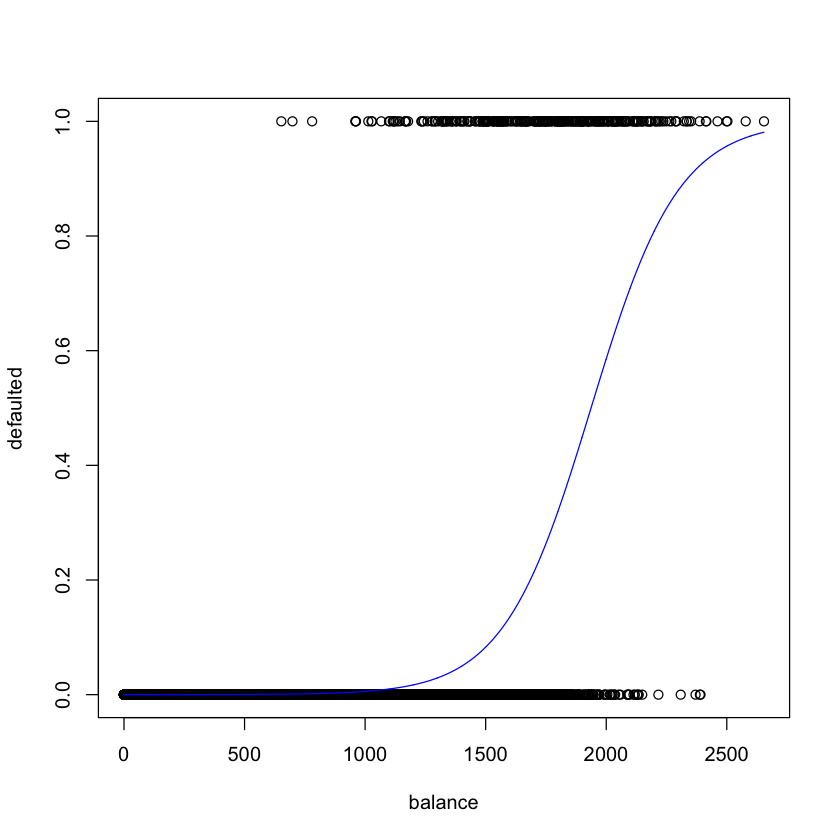

In [12]:
# 首先绘制原始观察点
plot(balance, defaulted)
# 要绘制估计概率，首先定义一个在“平衡”变量范围内取值的矢量x
x <- seq(from = min(balance), to=max(balance))
# 使用coef()函数获取估计系数
hat.beta <- coef(log.model)
# 估计概率并添加线条
lines(x, (1 + exp(-hat.beta[1] - hat.beta[2]*x))^(-1), col="blue")

> 上图显示，默认的估计概率随着`balance`的增加而增加。对于`balance`非常高的客户来说，它变得非常接近1，对于信用卡余额为0的客户来说，它变得非常接近于0。这比线性回归模型的输出更明智。

### 预测与模型准确度

> 函数 `predict()` 从包括 `lm()` 和 `glm()` 在内的多个拟合函数的结果中生成预测。此函数的三个最重要的参数是：`predict(object, newdata, type)`。\
`object`是拟合函数的输出。在我们的案例中，它可以是线性模型对象`linear.model`或逻辑回归对象`log.model`。\
`newdata`是一个可选参数，允许用户指定将进行预测的不同数据集。如果未指定，则会对用于拟合/估计模型的`data.frame`进行预测。\
`type`指定用户所需的预测类型。对于逻辑回归，默认值为`type="link"`，在这种情况下，函数返回模型的线性部分（即$\beta_0 + \beta_1balance$）。如果您想获得估计概率，您需要设置`type="response"`。

> 要决定分配（分类）客户到哪一类，`defaulted=“Yes”/“No”`，我们将估计概率与**阈值**进行比较。\
在下文中，我们将选择0.5的阈值，但请注意，这是一个任意的选择。\
基于这些分类，我们估计了错误分类错误，这实际上是估计类别不正确的时间比例。

In [13]:
# 计算默认情况下所有数据的估计默认概率
probs <- predict(log.model, newdata = Default, type="response")
# 如果估计概率>0.5，则预测第1类（即默认=是）
class.pred <- 1*(probs > 0.5)
# 验证预测
head(cbind(probs,class.pred), 10)

,probs,class.pred
1,1.305680e-03,0
2,2.112595e-03,0
3,8.594741e-03,0
4,4.344368e-04,0
5,1.776957e-03,0
6,3.704153e-03,0
7,2.211431e-03,0
8,2.016174e-03,0
9,1.383298e-02,0
10,2.366877e-05,0


In [14]:
# 创建真值表：行代表实际类，列代表预测
truth.table <- table(defaulted, class.pred)
truth.table

         class.pred
defaulted    0    1
        0 9625   42
        1  233  100

> 回顾`table()`函数的操作方式：第一个参数决定行，第二个参数确定列。这样\
`truth.table[1,1] = 9625`是好客户（`defaulted=0`）被预测为好客户（`class.pred=0`）；\
`truth.table[1,2] = 42`是好客户（`defaulted=0`）被预测为坏客户（`class.pred=1`）；\
`truth.table[2,1] = 233`是坏客户（`defaulted=1`）被预测为好客户（`class.pred=0`）；\
`truth.table[2,2] = 100`是坏客户（`defaulted=1`）被预测为坏客户（`class.pred=1`）；\
当实际类别和预测类别不同时，意味着错误。因此，错误对应于真值表的非对角线元素。分类错误（也称为错误率）是分类器错误预测类的次数比例。

In [15]:
# truth.table中的观察总数
N <- sum(truth.table)
# 分类错误
(truth.table[1,2]+ truth.table[2,1])/N
# 准确性=正确预测的比例
(truth.table[1,1]+ truth.table[2,2])/N

[1] 0.0275

[1] 0.9725

#### 阈值的解释
> 重要的是要了解，根据任何阈值对客户进行分类，例如`probs>0.5`，定义了预测变量`balance`的阈值。让我们更详细地解释一下：\
$$ P(defaulted = 1 | balance = x) = \frac{1}{1 + exp(10.65 - 0.0055x)} > \frac{1}{2} $$
$$ 1 + exp(10.65 - 0.0055x) < 2 $$
$$ 10.65 - 0.0055x < ln(1) $$
$$ x > \frac{10.65}{0.0055} = 1936.363634 $$
因此，信用卡`balance`大于1936.3636364的客户被归类为违约的客户，$\hat{Y} = 1$，任何信用卡余额较低的客户都被归类为不会违约的客户，$\hat{Y} = 0$。

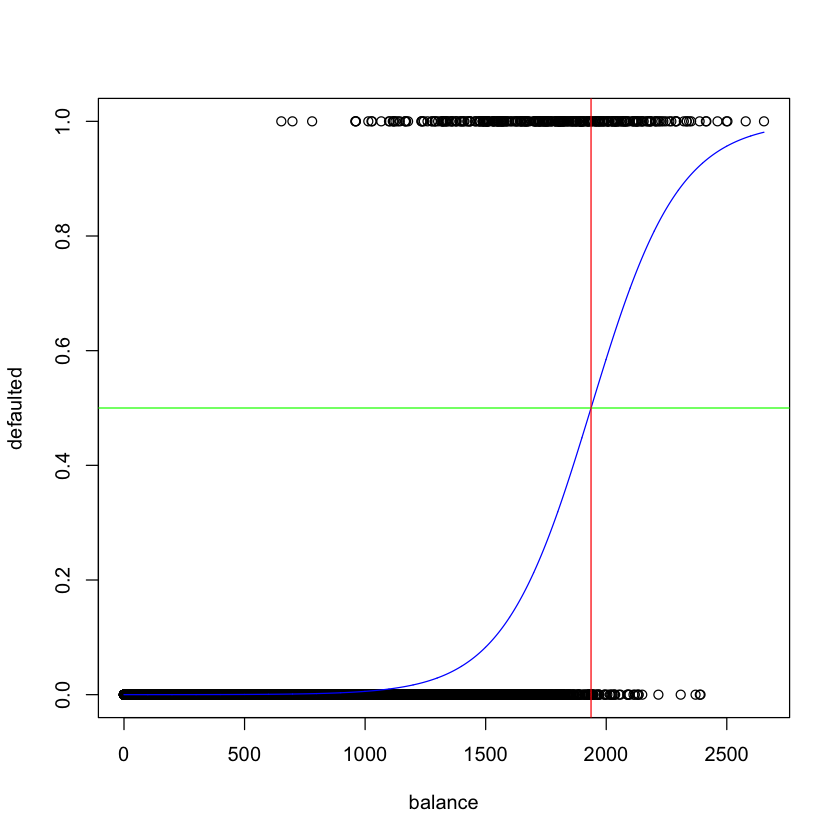

In [16]:
# 首先绘制原始数据点
plot(balance, defaulted)
# 绘制估计概率
lines(x, (1 + exp(-hat.beta[1] - hat.beta[2]*x))^(-1), col="blue")
# 绘制分类阀值（直线“h”或水平线）
abline(h=0.5, col="green")
# 绘制输入值的区间（直线“v”或垂直线）
abline(v=-hat.beta[1]/hat.beta[2], col="red")

> 在上图中，0.5的分类阈值用绿色水平线（$Y = 0.5$）表示。\
红线表示输入空间的分区（在这种情况下，只有一个输入：`balance`）。\
信用卡余额小于或等于1936.3636364的客户（即红线左侧的所有客户）被归类为良好风险（$\hat{Y} = 0$）。信用卡余额大于此值（即红线右侧）的客户被归类为不良风险（$\hat{Y} = 1$）。

### 多元逻辑回归

> 在估计具有多个变量的逻辑回归模型时，R代码没有任何变化。然而，当涉及到模型的解释时，情况发生了变化。我们将用最简单的示例来解决这个问题，涉及两个变量，`balance`和`income`：

In [17]:
# 用2个预测器估计逻辑回归
log.model2 <- glm(defaulted ~ balance + income, data=Default, family = binomial)
summary(log.model2)


Call:
glm(formula = defaulted ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


> 为了生成分类，我们预测的概率与阈值进行比较，再次使用0.5的（任意）门槛：
$$ P(defaulted = 1 | balance = x_1, income = x_2) = \frac{1}{1 + exp(11.54 - 0.0056x_1-0.00002x_2)} > \frac{1}{2} $$
$$ 1 + exp(11.54 - 0.0055x_1 - 0.00002x_2 < 2 $$
$$ 11.54 - 0.0056x_1 - 0.00002x_2 < ln(1) = 0 $$
$$ x > \frac{11.54}{0.00002} - \frac{0.0056}{0.00002} \times x$$

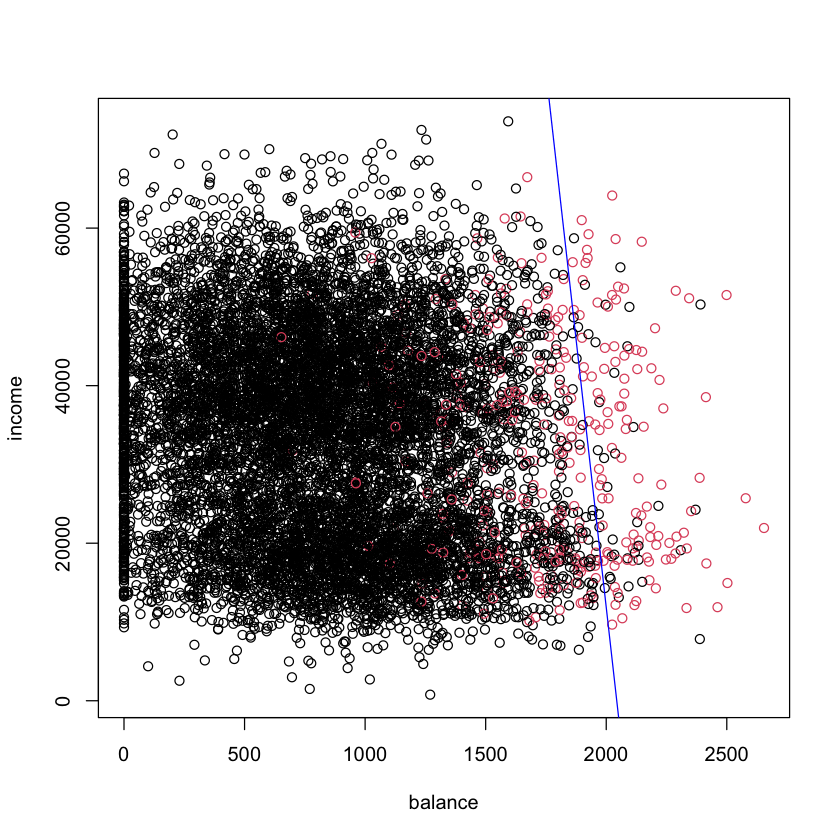

In [18]:
# 估计违约概率
probs2 <- predict(log.model2, data=Default, type="response")
# 使用defaulted作为颜色数据，绘制balance和income的散点图
plot(balance, income, col = as.factor(defaulted))
# 获取估计系数
hb <- coef(log.model2)
# 使用截距和斜率定义直线
abline(a=-hb[1]/hb[3], b=-hb[2]/hb[3], col="blue")

> 上图中的蓝线定义了决策边界。蓝线上的所有点（即所有余额和收入的组合）估计违约概率，$P(Y = 1|X_1 = x_1,X_2 = x_2)$，正好等于0.5。蓝线上方和右侧的估计违约概率高于0.5；下方和左侧的点的估计违约概率小于0.5。\
我们刚刚所做的说明了一个非常重要的事实，即逻辑回归在输入空间中强加了线性决策边界。这个边界是通过求解使估计概率完全等于阈值的（$X_1,X_2$）来确定的。\
如果我们使用不同的阈值，则可以选择分类阈值，例如0.1，或0.7，这将对垂直向上或向下移动这条线产生影响。换句话说，在上面的等式中，只有截距才会改变。使用0.1作为阈值来说明这一点：
$$ P(defaulted = 1 | balance = x_1, income = x_2) = \frac{1}{1 + exp(11.54 - 0.0056x_1-0.00002x_2)} > \frac{1}{10} $$
$$ 1 + exp(11.54 - 0.0055x_1 - 0.00002x_2 < 10 $$
$$ 11.54 - 0.0056x_1 - 0.00002x_2 < ln(9) $$
$$ x > \frac{11.54 - ln(9)}{0.00002} - \frac{0.0056}{0.00002} $$

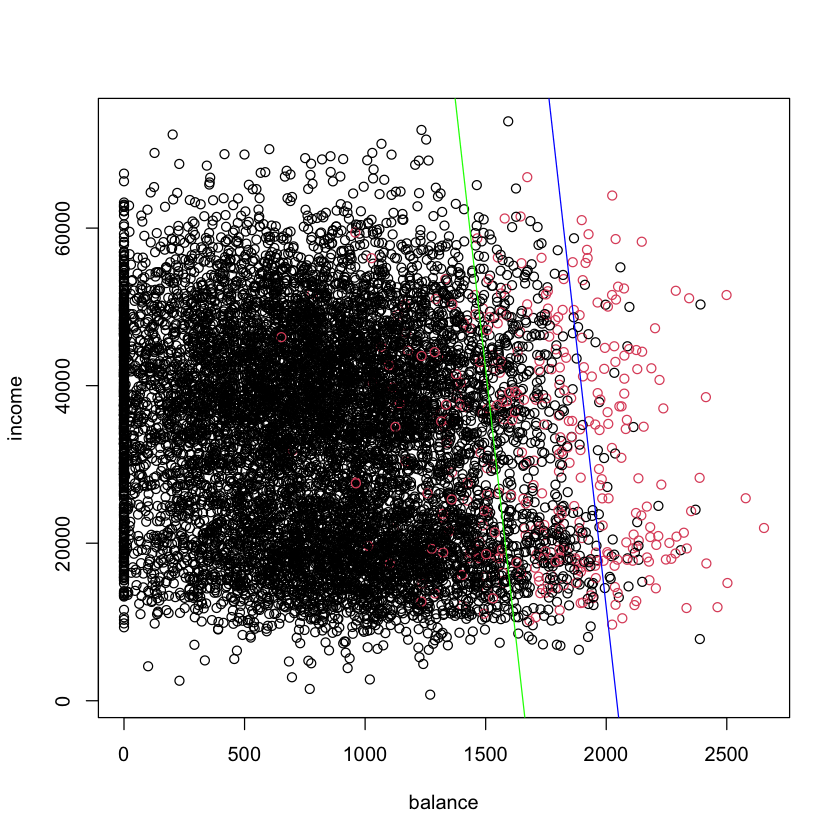

In [19]:
# 使用defaulted作为颜色数据，绘制balance和income的散点图
plot(balance, income, col = as.factor(defaulted))
# 获取估计系数
hb <- coef(log.model2)
# 阈值为0.5的决策边界
abline(a=-hb[1]/hb[3], b=-hb[2]/hb[3], col="blue")
# 阈值为0.1的决策边界
abline(a=(-hb[1]-log(9))/hb[3], b=-hb[2]/hb[3], col="green")

> 请**注意**，\
蓝线和绿线是平行的。发生这种情况是因为只有对决策边界的截距发生了变化，而不是斜率。\
介于蓝线和绿线之间的观察结果（客户）在阈值为0.5时被归类为良好风险，当阈值为0.1时被归类为坏风险。\
正如预期的那样，降低阈值会导致之前预测为第0类（良好风险）的一些观察结果现在处于第1类（坏风险）。\
如果门槛提高，情况正好相反。

### 灵敏度-特异性权衡和ROC曲线
> 从真相表中，我们可以直接估计另外两个非常重要的绩效概念：\
Sensitivity灵敏度（或真实阳性率）：正确预测了第1类观测结果的比例。
$$Sensitivity = \frac{TP}{TP+FN}$$
Specificity特异性（或真实阴性率）：正确预测的0类观测的比例。
$$Specificity = \frac{TN}{TN+FP}$$

> 在两个类别之一很少的情况下，或者当两个类别的错误分类成本不一致的情况下（例如考虑提供贷款或医疗诊断的情况），模型的准确性或错误率，可能是误导性的绩效指标。\
在此类应用中，根据类的定义，正确预测第1类（灵敏度）的观察或对第0类（特异性）的观察可能要重要得多。例如，如果第1类对应于患有罕见疾病的人，那么将患有该疾病的人错误归类为健康（假阴性）的成本（后果）远高于将没有该疾病的人（假阳性）分类错误的成本。\
准确性（错误率）不能区分这两种类型的错误，因此认为它们同等重要。

In [20]:
# 构建模型
log.model <- glm(defaulted ~ balance, data = Default, family = binomial)
# 从模型中获取预测概率
pred <- predict(log.model, newdata = Default, type="response")
# 如果估计概率>0.5则预测为第1类
Class.pred <- 1*(pred > 0.5)
# 构建真相表
T <- table(Default$defaulted, class.pred)
T

   class.pred
       0    1
  0 9625   42
  1  233  100

In [21]:
# 灵敏性 (真实阳性率)
T[2,2]/(T[2,1]+T[2,2])
# 特异性 (真实阴性率)
T[1,1]/sum(T[1,])

[1] 0.3003003

[1] 0.9956553

> Receiver Operating Characteristic（ROC）曲线说明了给定分类器可以实现的灵敏度和特异性之间的所有可能的权衡。ROC曲线是通过更改阈值构建的，由此产生的灵敏度和特异性之间的权衡被描述为一条曲线。为了构建ROC曲线，我们使用`pROC`包。

载入需要的程辑包：pROC

Type 'citation("pROC")' for a citation.


载入程辑包：‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



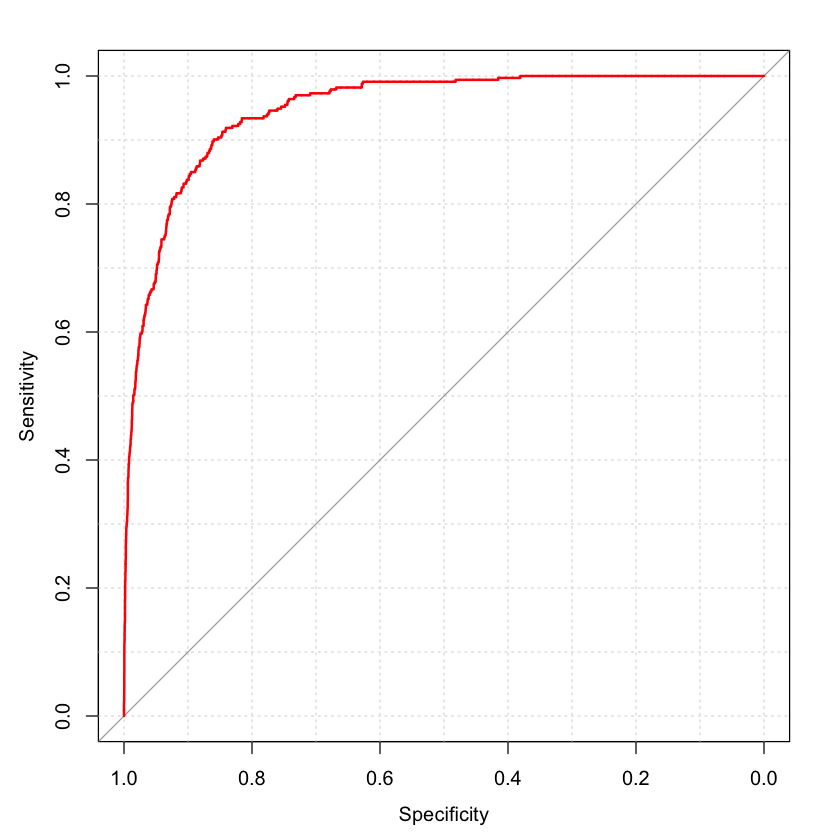

In [22]:
require(pROC)
# Estimate ROC curve and plot it
roc1 <- roc(Default$defaulted, pred, plot=TRUE, grid=TRUE, col="red")

> 该曲线的垂直轴测量灵敏度（真阳率），而水平轴测量假阳率，等于1-特异性。`pROC`可以在水平轴上测量特异性从1到0。\
ROC曲线非常重要，因为它允许我们回答以下问题：\
如果想正确地对1类（0）类观测结果的x%进行预测，那么从0（1）类中错误分类的比例是多少？\
例如，在医学背景下，这些问题被翻译为：“如果我想确保99%的患者被正确诊断为疾病，我将不得不误诊多少健康的人为患者？”\
上述类型的问题指的是敏感性和特异性之间的平衡。\
可以使用`pROC`包中的`coords()`函数从ROC曲线中提取这些问题的答案。

In [23]:
# coords() 作为输入：
# 1. ROC对象（roc1），
# 2. `x= `指定我们感兴趣的目标的价值
# 3. `input= ` 指定此目标是什么
# 4. `ret= `指定我们想要的输出（默认情况下，返回阈值、特异性和灵敏度）
coords(roc1, x = 0.992862315092583, input="specificity")
# 如果想获得构建真值表所需的所有信息
r <- c("threshold","specificity","sensitivity","accuracy","tp","tn","fp","fn") 
coords(roc1, x = 0.992862315092583, input="specificity", ret = r)

threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.4092583,0.9928623,0.3873874


,threshold,specificity,sensitivity,accuracy,tp,tn,fp,fn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
threshold,0.4092583,0.9928623,0.3873874,0.9727,129,9598,69,204


In [24]:
# 有时可能要求一个灵敏度或特异性的值，其中没有完全达到它的阈值。
# 在这种情况下，coords()函数平均了最近两个值的结果。
coords(roc1, x=0.9, input="specificity", ret = r)

,threshold,specificity,sensitivity,accuracy,tp,tn,fp,fn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
threshold,NA,0.9,0.8378378,0.89793,279,8700.3,966.7,54


#### 基于ROC曲线的分类器比较

> 为了说明如何使用ROC曲线进行性能比较，为同一数据集使用不同的分类器。

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



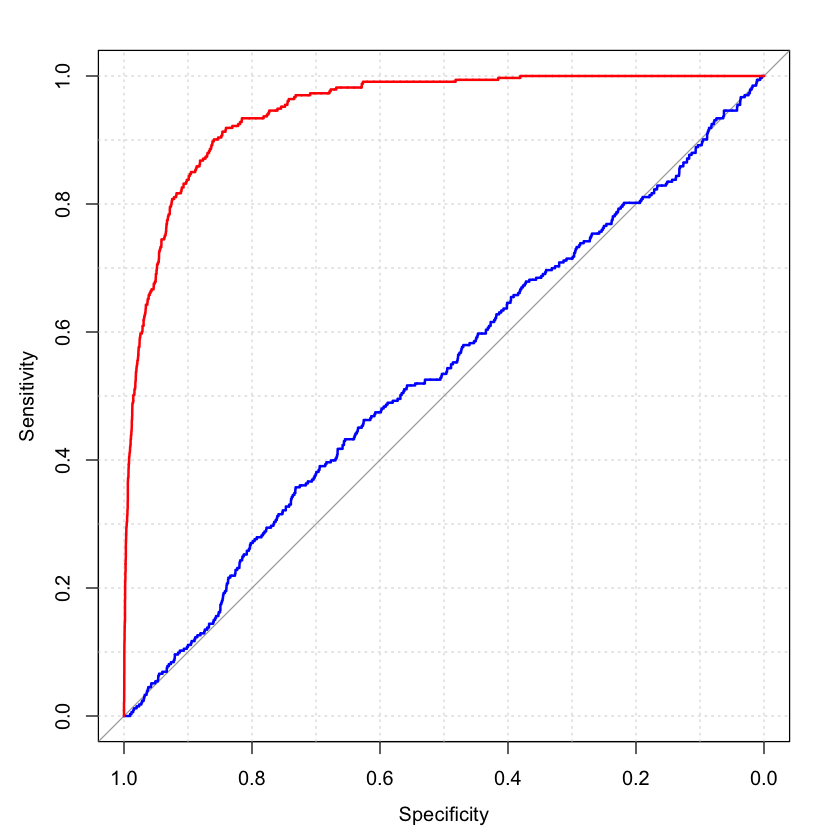

In [25]:
# 构建两个不同的分类器模型
log.model1 <- glm(defaulted ~ balance, data = Default, family = binomial)
log.model2 <- glm(defaulted ~ income, data = Default, family = binomial)
# 使用两个模型分布获得预测
pred.m1 <- predict(log.model1, newdata = Default, type="response")
pred.m2 <- predict(log.model2, newdata = Default, type="response")
# 估计和绘制ROC曲线
roc1 <- roc(Default$defaulted, pred.m1, plot=FALSE, grid=TRUE, col="blue")
roc2 <- roc(Default$defaulted, pred.m2, plot=TRUE, grid=TRUE, col="blue")
# 添加之前的ROC曲线来绘制
plot(roc1, add=TRUE, col="red")

> 我们从上面的图中看到，模型`m1`的ROC总是高于模型`m2`的ROC。这意味着：\
对于任何给定的灵敏度，模型`m1`允许实现更高的特异性。\
对于任何给定的特异性，模型`m1`允许实现更高的灵敏度。\
因此，每当一个分类器（`m1`）的ROC曲线高于另一个分类器（`m2`）时，`m1`总是优于`m2`。

#### ROC曲线下的面积

> 通常情况下，当我们通过ROC曲线比较分类器时，没有一个分类器的ROC曲线总是高于所有其他分类器。这意味着没有一个分类器总是更好的。\
在这种情况下，要在分类器中进行选择，我们可以使用项目/业务目标。例如灵敏度目标（`sensitivity=0.9`），应该选择针对给定灵敏度值实现最高特异性的分类器。\
如果我们在灵敏度或特异性方面没有预先确定的目标，我们可以使用ROC下的区域（AUC）来量化分类器在所有可能的阈值上的性能。\
AUC总是在0和1之间，更高的值意味着更好的性能。在比较ROC相交的分类器时，此指标特别有用。

In [26]:
# ROC曲线下的面积
auc(roc1)
auc(roc2)

Area under the curve: 0.948

Area under the curve: 0.5327

> 对于模型`m1`，AUC指标非常接近1，这告诉我们逻辑回归模型的表现非常好。\
最后，在没有预先确定的灵敏度或特异性目标的情况下，我们可以使用与最接近ROC曲线左上角的点相对应的阈值（即最接近理想分类器ROC曲线的点）。这被认为是分类器可以实现的最佳灵敏度/特异性权衡。

In [27]:
opt <- coords(roc1, x="best",method="closest.topleft", ret=r)
opt

,threshold,specificity,sensitivity,accuracy,tp,tn,fp,fn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
threshold,0.0317558,0.8596255,0.9009009,0.861,300,8310,1357,33


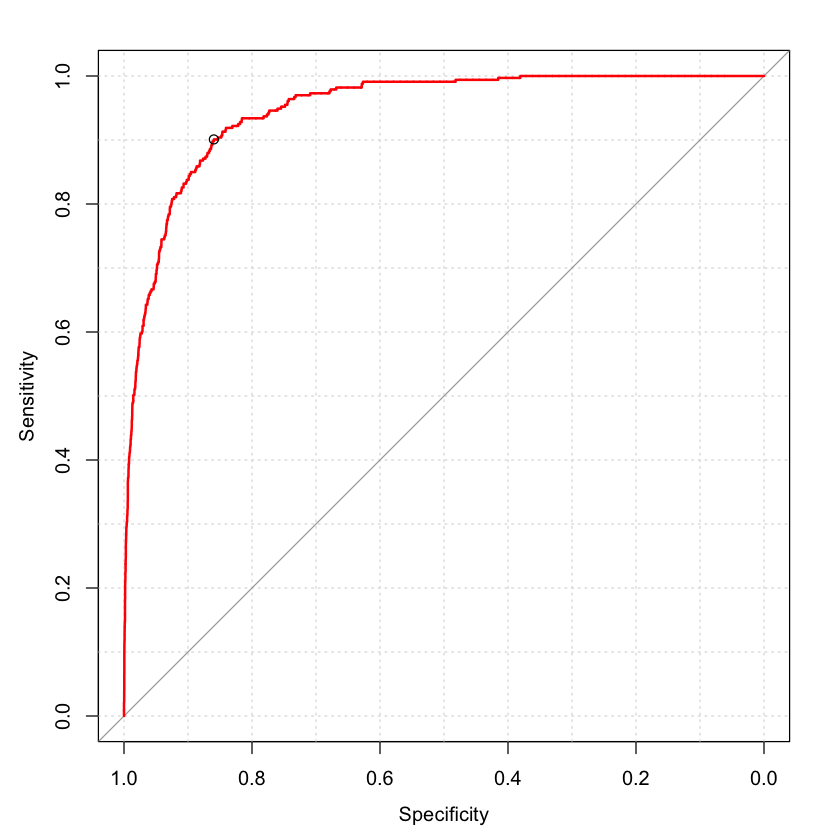

In [28]:
# 重新绘制ROC曲线
plot(roc1, col="red", grid=TRUE)
# 在ROC曲线中添加代表最佳权衡的点
lines(opt["specificity"], opt["sensitivity"], type="p")

## CourseWork 示例

> 营销销售活动旨在加强业务，公司通过联系客户以实现特定目标，使用直接营销来瞄准客户群体。本次有兴趣开发和评估数据驱动的模型，以模拟银行电话营销活动的成功。\
本次目的是开发能够准确预测电话销售长期银行存款结果的统计模型，这些模型很有价值，因为它们有助于银行经理优先考虑和选择在营销活动期间要联系的下一位客户。\
提高此类活动的效率可以减少时间和相关成本，此外，通过拨打更少、更有效的电话，客户压力和侵入性也减少了。\
数据来自一家[葡萄牙银行](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)，于2008年至2013年收集。因此，这一时期包括2008年达到顶峰的全球金融危机的影响。\
数据集提供了来自整体数据集的4119次观测结果的随机样本，每条记录（观测）包含输出目标、y和19个输入特征。这些包括电话营销属性（例如呼叫方向）、产品详细信息（例如提供的利率）和客户信息（例如年龄）。并通过从葡萄牙央行收集外部数据，这些记录丰富了社会和经济影响特征（例如失业率变化率）。

In [1]:
library(dplyr)
library(bestglm)
library(glmnet)
library(caret)
library(pROC)
library(ggplot2)
library(Rmisc)

load("./DataSet/markdetingdata.r")
# 删除两个无用的变量:default和duration
markdetingdata <- markdetingdata[,c(-5,-11)]

str(markdetingdata)


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：leaps

载入需要的程辑包：Matrix

Loaded glmnet 4.1-4

载入需要的程辑包：ggplot2

载入需要的程辑包：lattice

Type 'citation("pROC")' for a citation.


载入程辑包：‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


载入需要的程辑包：plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


载入程辑包：‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




'data.frame':	3890 obs. of  19 variables:
 $ age           : int  30 39 25 38 47 32 32 41 31 35 ...
 $ job           : chr  "blue-collar" "services" "services" "services" ...
 $ marital       : chr  "married" "single" "married" "married" ...
 $ k             : chr  "basic.9y" "high.school" "high.school" "basic.9y" ...
 $ housing       : chr  "yes" "no" "yes" "unknown" ...
 $ loan          : chr  "no" "no" "no" "unknown" ...
 $ contact       : chr  "cellular" "telephone" "telephone" "telephone" ...
 $ month         : chr  "may" "may" "jun" "jun" ...
 $ day_of_week   : chr  "fri" "fri" "wed" "fri" ...
 $ campaign      : int  2 4 1 3 1 3 4 2 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 0 0 2 0 0 1 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.rate  : num  -1.8 1.1 1.4 1.4 -0.1 -1.1 -1.1 -0.1 -0.1 1.1 ...
 $ cons.price.idx: num  92.9 94 94.5 94.5 93.2 ...
 $ cons.conf.idx : n

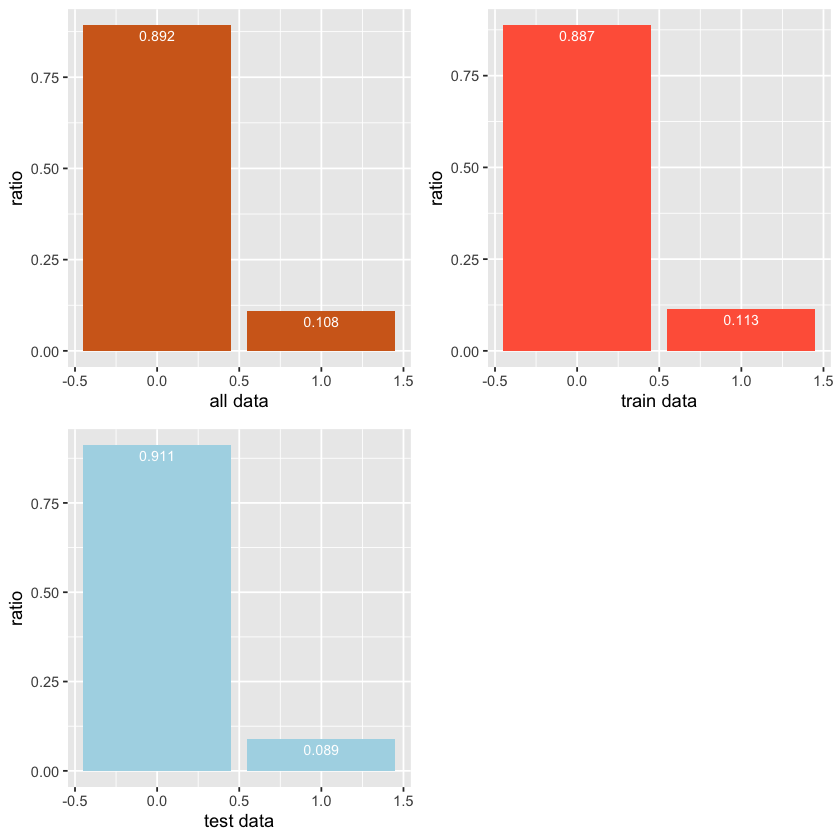

In [2]:
# 划分数据集
folds <- createFolds(y = markdetingdata$y,k = 5)
fold_test <- markdetingdata[folds[[1]],]
fold_train <- markdetingdata[-folds[[1]],]

# 验证数据集划分是否合理
all_data <- markdetingdata %>%
  group_by(y) %>%
  dplyr::summarise(n = n()) %>%
  mutate(ratio = n/sum(n))

test_data <- fold_test %>%
  group_by(y) %>%
  dplyr::summarise(n = n()) %>%
  mutate(ratio = n/sum(n))

train_data <- fold_train %>%
  group_by(y) %>%
  dplyr::summarise(n = n()) %>%
  mutate(ratio = n/sum(n))

all_data$ratio <- round(all_data$ratio, digits = 3) 
test_data$ratio <- round(test_data$ratio, digits = 3) 
train_data$ratio <- round(train_data$ratio, digits = 3) 

p1 <- ggplot(all_data, aes(x = y , y = ratio)) +
  geom_bar(stat = "identity", position = "dodge", fill = "chocolate") +
  geom_text(aes(label = ratio), size = 3, colour = "white", vjust = 1.5) +
  labs(y = "ratio", x = "all data")
p2 <- ggplot(test_data, aes(x = y , y = ratio)) +
  geom_bar(stat = "identity", position = "dodge", fill = "lightblue") +
  geom_text(aes(label = ratio), size = 3, colour = "white", vjust = 1.5) +
  labs(y = "ratio", x = "test data")
p3 <- ggplot(train_data, aes(x = y , y = ratio)) +
  geom_bar(stat = "identity", position = "dodge", fill = "tomato") +
  geom_text(aes(label = ratio), size = 3, colour = "white", vjust = 1.5) +
  labs(y = "ratio", x = "train data")

multiplot(p1,p2,p3,cols = 2)

### 使用逐步回归的方法

In [3]:
# 简单的逐步选择
full <- glm(y ~ ., data = fold_train, family=binomial)
null <- glm(y ~ 1, data = fold_train, family=binomial)
forward_model <- step(null, scope=formula(full), direction="forward")
backward_model <- step(full, scope=formula(null), direction="backward",
                       k=log(nrow(markdetingdata)))

# 带CV的逐步选择
source("./DataSet/stepCV.R")
model <- stepCV(fold_train, response = "y", K=8, perf="auc")
stepCV_model <- model$BestModel

Start:  AIC=2198.88
y ~ 1

                 Df Deviance    AIC
+ nr.employed     1   1861.0 1865.0
+ euribor3m       1   1935.6 1939.6
+ emp.var.rate    1   1962.9 1966.9
+ poutcome        2   1991.2 1997.2
+ pdays           1   1998.6 2002.6
+ month           9   2030.8 2050.8
+ previous        1   2049.9 2053.9
+ contact         1   2130.0 2134.0
+ campaign        1   2166.1 2170.1
+ job            10   2151.3 2173.3
+ cons.price.idx  1   2171.1 2175.1
+ age             1   2182.5 2186.5
+ cons.conf.idx   1   2183.8 2187.8
+ k               5   2181.0 2193.0
+ marital         2   2189.8 2195.8
<none>                2196.9 2198.9
+ housing         2   2196.6 2202.6
+ loan            2   2196.8 2202.8
+ day_of_week     4   2195.9 2205.9

Step:  AIC=1865.01
y ~ nr.employed

                 Df Deviance    AIC
+ month           9   1788.9 1810.9
+ poutcome        2   1804.3 1812.3
+ pdays           1   1811.5 1817.5
+ cons.conf.idx   1   1845.2 1851.2
+ previous        1   1852.3 1858.3


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misl

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7529

Area under the curve: 0.7799

Area under the curve: 0.7145

Area under the curve: 0.7378

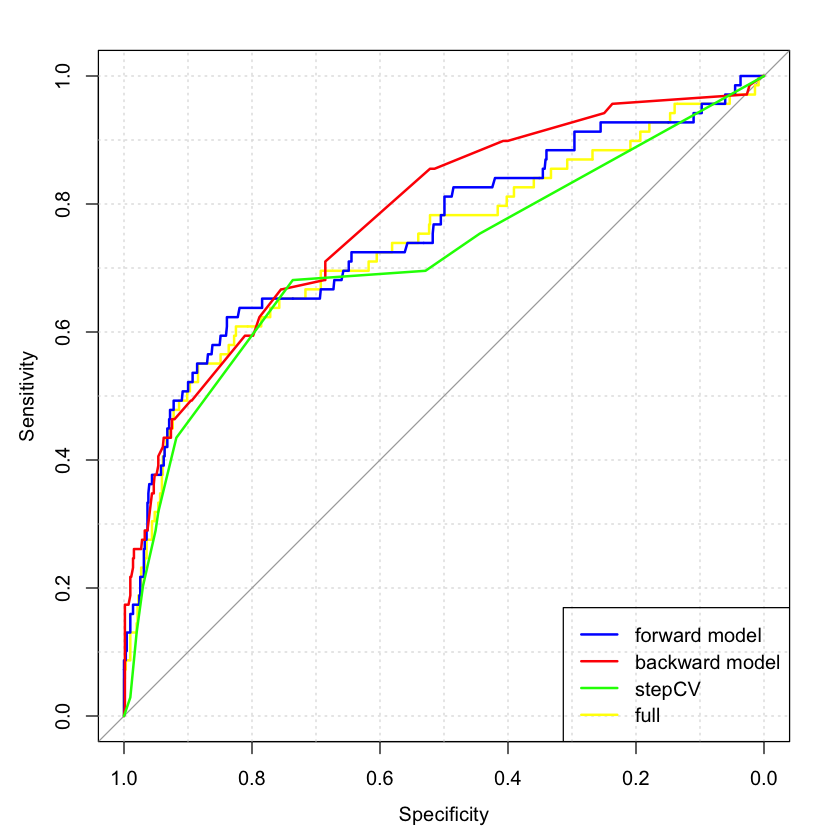

In [4]:
# 产生预测
forward_predict <- predict(forward_model,type='response',newdata=fold_test)
backward_predict <- predict(backward_model,type='response',newdata=fold_test)
stepCV_predict <- predict(stepCV_model,type='response',newdata=fold_test)
full_predict <- predict(full,type='response',newdata=fold_test)

# 绘制ROC曲线进行比较
forward_roc <- roc(fold_test$y, forward_predict, plot=FALSE)
backward_roc <- roc(fold_test$y, backward_predict, plot=FALSE)
stepCV_roc <- roc(fold_test$y, stepCV_predict, plot=FALSE)
full_roc <- roc(fold_test$y, full_predict, plot=TRUE, grid=TRUE, col="yellow")

plot(forward_roc, add=TRUE, col="blue")
plot(backward_roc, add=TRUE, col="red")
plot(stepCV_roc, add=TRUE, col="green")
# 添加ROC曲线的图例
legend("bottomright", legend=c("forward model","backward model","stepCV","full"), 
       col=c("blue","red","green","yellow"), lty=1, lwd=2,cex=1)

# 通过AUC的大小进一步比较模型
auc(forward_roc)
auc(backward_roc)
auc(stepCV_roc)
auc(full_roc)

### 使用惩罚最大似然性的方法

载入需要的程辑包：doMC

载入需要的程辑包：foreach

载入需要的程辑包：iterators

载入需要的程辑包：parallel



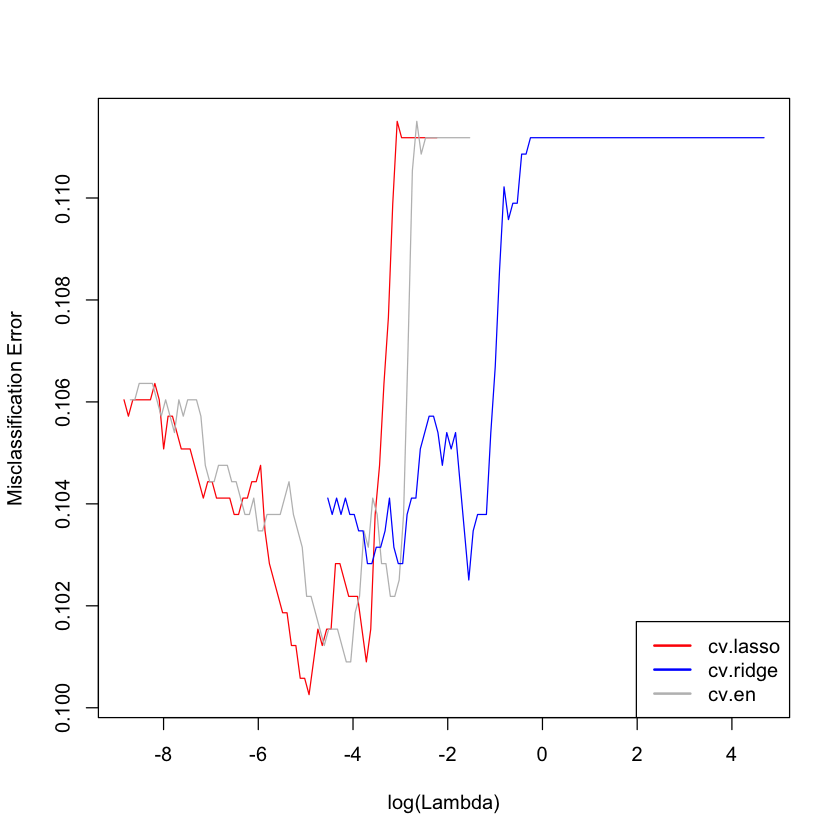

In [5]:
# 划分数据集
load("./DataSet/markdetingdata.r")
markdetingdata <- markdetingdata[,c(-5,-11)]
folds <- createFolds(y = markdetingdata$y,k = 5)
fold_test <- markdetingdata[folds[[1]],]
fold_train <- markdetingdata[-folds[[1]],]

# 由于使用惩罚最大似然性必须使用矩阵
# 因此对于分类变量热编码，从而构建矩阵
xfactorsTrain <- model.matrix(y~job+marital+k+housing+loan
                              +contact+month+day_of_week+poutcome, 
                              data=fold_train[,-1])
xnumTrain <- as.matrix(fold_train[,c(1,10:12,14:18)])
xTrain_martrix <- cbind(xfactorsTrain, xnumTrain)
yTrain_martrix <- as.matrix(fold_train[,19])

xfactorsTest <- model.matrix(y~job+marital+k+housing+loan
                             +contact+month+day_of_week+poutcome, 
                             data=fold_test[,-1])
xnumTest <- as.matrix(fold_test[,c(1,10:12,14:19)])
xTest_martrix <- cbind(xfactorsTest, xnumTest)

# 使用LASSO，岭回归和弹性网分别构建模型
require(doMC)
set.seed(20210508)
fid <- sample(1:10, size = nrow(fold_train), replace = TRUE)
registerDoMC(cores=2)
cv.lasso <- cv.glmnet(x = xTrain_martrix, y = yTrain_martrix,
                     family = "binomial", alpha = 1,type.measure = "class",
                     parallel = TRUE, nfolds = 6, foldid = fid)
cv.ridge <- cv.glmnet(x = xTrain_martrix, y = yTrain_martrix,
                     family = "binomial", alpha = 0, type.measure = "class",
                     parallel = TRUE, nfolds = 6, foldid = fid)
cv.en <- cv.glmnet(x = xTrain_martrix, y = yTrain_martrix,
                  family = "binomial", alpha = 0.5, type.measure = "class",
                  parallel = TRUE, nfolds = 6, foldid = fid)

L <- c(cv.lasso$lambda, cv.ridge$lambda, cv.en$lambda)
xlim <- log(c(min(L), max(L)))
plot(log(cv.lasso$lambda), cv.lasso$cvm, type="l", col="red", 
     xlim=xlim,xlab="log(Lambda)", ylab=cv.lasso$name) 
lines(log(cv.en$lambda),cv.en$cvm, pch=16,col="grey")
lines(log(cv.ridge$lambda),cv.ridge$cvm, pch=16, col="blue")
# 添加ROC曲线的图例
legend("bottomright", legend=c("cv.lasso","cv.ridge","cv.en"), 
       col=c("red","blue","grey"), lty=1, lwd=2,cex = 1)

Setting levels: control = 0, case = 1

Warning message in roc.default(xTest_martrix[, ncol(xTest_martrix)], lasso.min, :
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(xTest_martrix[, ncol(xTest_martrix)], lasso.1se):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(xTest_martrix[, ncol(xTest_martrix)], ridge.min):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(xTest_martrix[, ncol(xTest_martrix)], ridge.1se):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a n

Area under the curve: 0.7556

Area under the curve: 0.7558

Area under the curve: 0.7609

Area under the curve: 0.7607

Area under the curve: 0.7572

Area under the curve: 0.7685

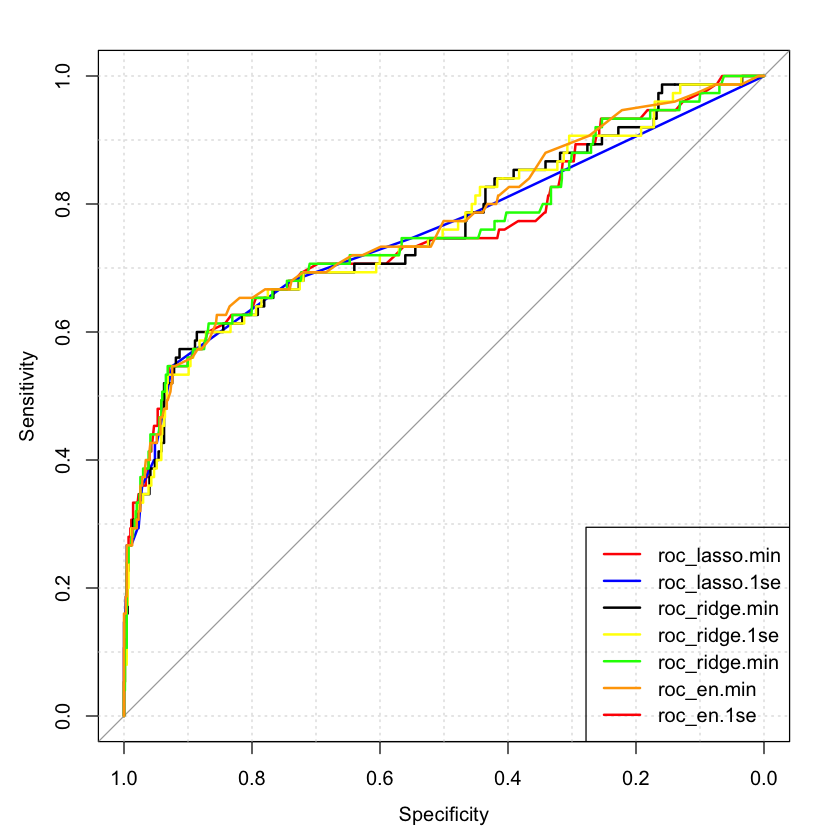

In [6]:
# 使用模型进行预测
lasso.min <- predict(cv.lasso, newx = xTest_martrix[,1:ncol(xTest_martrix)-1], 
                     s = "lambda.min", type="response")
lasso.1se <- predict(cv.lasso, newx = xTest_martrix[,1:ncol(xTest_martrix)-1], 
                     s = "lambda.1se", type="response")
ridge.min <- predict(cv.ridge, newx = xTest_martrix[,1:ncol(xTest_martrix)-1], 
                     s = "lambda.min", type="response")
ridge.1se <- predict(cv.ridge, newx = xTest_martrix[,1:ncol(xTest_martrix)-1], 
                     s = "lambda.1se", type="response")
en.min <- predict(cv.en, newx = xTest_martrix[,1:ncol(xTest_martrix)-1], 
                  s = "lambda.min", type="response")
en.1se <- predict(cv.en, newx = xTest_martrix[,1:ncol(xTest_martrix)-1], 
                  s = "lambda.1se", type="response")

# 绘制所有模型预测的ROC曲线
roc_lasso.min <- roc(xTest_martrix[,ncol(xTest_martrix)], lasso.min, 
                     plot=TRUE, grid=TRUE, col="red")
roc_lasso.1se <- roc(xTest_martrix[,ncol(xTest_martrix)], lasso.1se)
roc_ridge.min <- roc(xTest_martrix[,ncol(xTest_martrix)], ridge.min)
roc_ridge.1se <- roc(xTest_martrix[,ncol(xTest_martrix)], ridge.1se)
roc_en.min <- roc(xTest_martrix[,ncol(xTest_martrix)], en.min)
roc_en.1se <- roc(xTest_martrix[,ncol(xTest_martrix)], en.1se)
plot(roc_lasso.1se, add=TRUE, col="blue")
plot(roc_ridge.min, add=TRUE, col="black")
plot(roc_ridge.1se, add=TRUE, col="yellow")
plot(roc_en.min, add=TRUE, col="green")
plot(roc_en.1se, add=TRUE, col="orange")

# 添加ROC曲线的图例
legend("bottomright", legend=c("roc_lasso.min","roc_lasso.1se","roc_ridge.min","roc_ridge.1se",
                            "roc_ridge.min","roc_en.min","roc_en.1se"), 
       col=c("red","blue","black","yellow","green","orange"), lty=1, lwd=2,cex = 1)

# 通过AUC的大小进一步比较模型
auc(roc_lasso.min)
auc(roc_lasso.1se)
auc(roc_ridge.min)
auc(roc_ridge.1se)
auc(roc_en.min)
auc(roc_en.1se)

In [7]:
# 查看最佳模型的参数
coef(cv.en, s="lambda.min")

48 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)          33.2005109830
(Intercept)           .           
jobblue-collar        .           
jobentrepreneur       .           
jobhousemaid          .           
jobmanagement         .           
jobretired            .           
jobself-employed      .           
jobservices           .           
jobstudent            .           
jobtechnician         .           
jobunemployed         0.0942594664
maritalmarried        .           
maritalsingle         .           
kbasic.6y             .           
kbasic.9y            -0.0211395043
khigh.school          .           
kprofessional.course  .           
kuniversity.degree    0.0047720170
housingunknown        .           
housingyes            .           
loanunknown           .           
loanyes               .           
contacttelephone     -0.1798605589
monthaug              .           
monthdec              0.0264559737
monthjul     